In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
#Reads data into Python
#Only keeps columns related to date and time of accident, borough, and number of deaths/injuries
#Data related to number of vehicles, kind of vehicles, etc. is not read into memory
#Lambda commands convert strings into date and time objects

td = pd.read_csv("NYPD_Motor_Vehicle_Collisions_-_Crashes.csv", usecols=[0,1,2,3,10,11,12,13,14,15,16,17], low_memory=False)
td["DATE"] =td["DATE"].apply(lambda x: dt.datetime.strptime(x,"%m/%d/%Y").date())
td["TIME"] =td["TIME"].apply(lambda x: dt.datetime.strptime(x,"%H:%M").time())

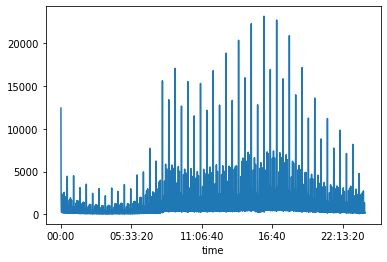

In [4]:
#goal of this plot is visualize distribution of "Time" to see if values were clustered in odd ways
#suggest times are estimates, but roughly correspond to what one would expect of accident data - i.e. it spikes later in the day
#however, the 00:00 value does NOT match what one would expect - it's far more common then the values that precede
#and follow it
#suggests it served as some kind of place holder and ideally should be modified in some fashion to better reflect data trend
#value can't just be adjusted down - they are real crash events after all
#need to think about this further 
td["CRASH EVENTS"]=1
timez = td.groupby(["TIME"]).sum()
timez = timez.reset_index()
timez.sort_values(by=['TIME'],ascending=True)
plt.plot(timez["TIME"],timez['CRASH EVENTS'])

In [8]:
# goal of the below transformations and plots is to eyeball if different groups  (pedestrians, cyclists, and motorists) 
# have a different distribution of  injuries throughout a day
# Motorists appearing to a higher realtive injury rate during the early morning
# cyclysts appear to have a higher realtive injury rate during the day
# Might be worth digging into more


timez["% OF CRASH EVENTS"]= timez['CRASH EVENTS'].apply(lambda x: x/timez['CRASH EVENTS'].sum())
timez["% OF NUMBER OF PEDESTRIANS INJURED"]= timez['NUMBER OF PEDESTRIANS INJURED'].apply(lambda x: x/timez['NUMBER OF PEDESTRIANS INJURED'].sum())
timez["% OF NUMBER OF CYCLIST INJURED"]= timez['NUMBER OF CYCLIST INJURED'].apply(lambda x: x/timez['NUMBER OF CYCLIST INJURED'].sum())
timez["% OF NUMBER OF MOTORIST INJURED"]= timez['NUMBER OF MOTORIST INJURED'].apply(lambda x: x/timez['NUMBER OF MOTORIST INJURED'].sum())

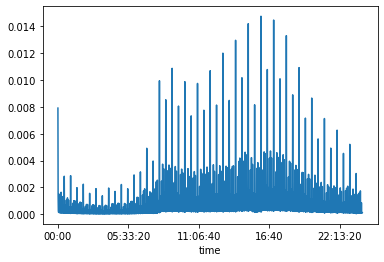

In [9]:
plt.plot(timez["TIME"],timez['% OF CRASH EVENTS'])

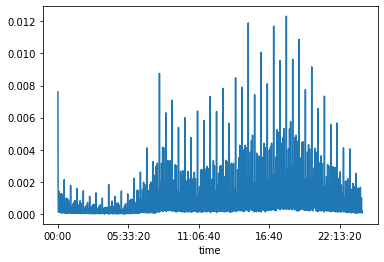

In [10]:
plt.plot(timez["TIME"],timez['% OF NUMBER OF PEDESTRIANS INJURED'])

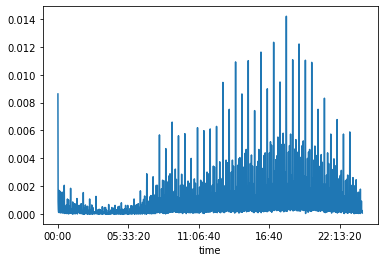

In [11]:
plt.plot(timez["TIME"],timez['% OF NUMBER OF CYCLIST INJURED'])

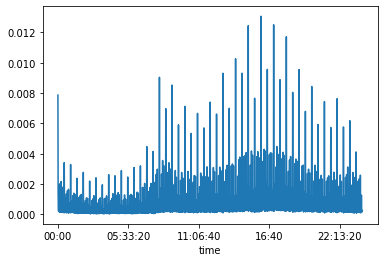

In [12]:
plt.plot(timez["TIME"],timez['% OF NUMBER OF MOTORIST INJURED'])

In [18]:
#these two sections transform the data to time series, still working on getting the X axis lables right

td["MONTH"] =pd.DatetimeIndex(td['DATE']).month
td["YEAR"] =pd.DatetimeIndex(td['DATE']).year

In [26]:
bymonth = td.groupby(['MONTH','YEAR']).sum()
bymonth["CRASH TO INJURIES"]=bymonth["CRASH EVENTS"]/bymonth["NUMBER OF PERSONS INJURED"]
bymonth["CRASH TO DEATHS"]=bymonth["CRASH EVENTS"]/bymonth["NUMBER OF PERSONS KILLED"]
bymonth['MONTH/YEAR']= bymonth['MONTH'].apply(str) + '/' + bymonth['YEAR'].apply(str)
bymonth.sort_values(by=(['YEAR','MONTH']),ascending=True,inplace=True)
bymonth = bymonth.reset_index()

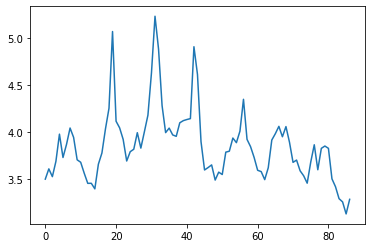

In [90]:
#Ratio of crashs to injuries, from the start of the time series

plt.plot(range(len(bymonth["MONTH"])),bymonth["CRASH TO INJURIES"])

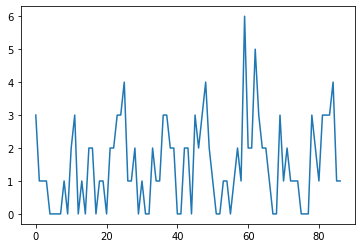

In [32]:
plt.plot(range(len(bymonth["MONTH"])),bymonth["NUMBER OF CYCLIST KILLED"])